<a href="https://colab.research.google.com/github/miquelamorosaldev/dawbio2-m14-proven-uf1/blob/master/M14_UF1_6_TitanicPlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas i Seaborn. Gràfics amb el dataset del Titanic.

### Tutorial que seguim:
https://www.kaggle.com/code/faressayah/data-science-best-practices-using-pandas-titanic

### Dades Titanic que cal descarregar, web Pandas:
https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv


Si no recordes exactament com va Pandas recomanem fer aquest exemple abans:
https://colab.research.google.com/github/asalber/aprendeconalf/blob/master/content/es/docencia/python/ejercicios/soluciones/pandas/ejercicio7.ipynb

Descripció de les variables del dataset.
- **PassengerId** Unique ID of the passenger
- **Survived** Survived (1) or died (0)
- **Pclass** Passenger's class (1st, 2nd, or 3rd)
- **Name** Passenger's name
- **Sex** Passenger's sex
- **Age** Passenger's age
- **SibSp** Number of siblings/spouses aboard the Titanic
- **Parch** Number of parents/children aboard the Titanic
- **Ticket** Ticket number
- **Fare** Fare paid for ticket
- **Cabin** Cabin number
- **Embarked** Where the passenger got on the ship (C - Cherbourg, S - Southampton, Q = Queenstown)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv
titanic_df = pd.read_csv('./sample_data/titanic.csv')
print(titanic_df.head())

# Exploring the data using pandas methods : 'shape', 'info', 'describe', 'dtype', 'mean()', ...
print(f"DataFrame shape : {titanic_df.shape}\n===========")
print(f"DataFrame info : {titanic_df.info()}\n============")
print(f"DataFrame columns : {titanic_df.columns}\n==========")
print(f"The type of each column : {titanic_df.dtypes}\n=============")
print(f"How much missing value in every column : {titanic_df.isna().sum()}\n=====")

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Da

### Question 1 - Qui van ser els passatgers del Titanic ?

#### Obtenim el gènere de tots.

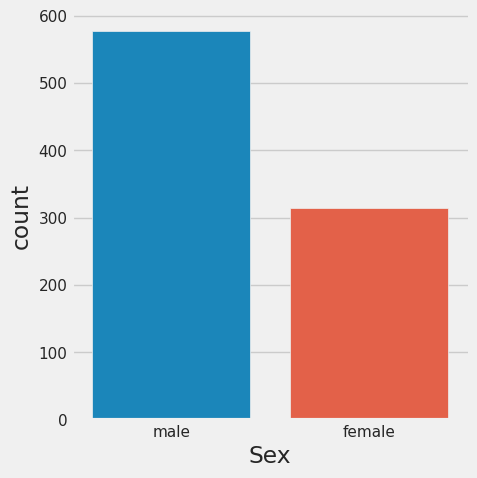

In [4]:
sns.set(style="ticks")
plt.style.use("fivethirtyeight")
# Let's first check gender
# 'catplot()': Figure-level interface for drawing categorical plots onto a FacetGrid.
sns.catplot(x='Sex', data=titanic_df, kind='count')

# Function to save plot in HD
# plt.savefig('save_as_a_png.png')



#### Obtenim el gènere classificat per classe del passatge (Pc

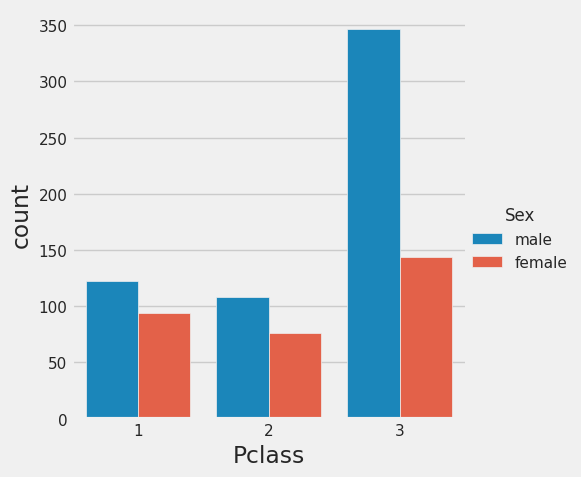

In [5]:
# Now let separate the gender by classes passing 'Sex' to the 'hue' parameter
sns.catplot(x='Pclass', data=titanic_df, hue='Sex', kind='count')

I ja obtenim una informació interessant dels passatgers del Titanic, que hi ha molts homes que es van posar a 3a classe com un dels protagonistes de la famosa peli.
<hr/>

### Ara analitzem si es va complir l’objectiu principal en cas de catàstrofe:
**S'han de rescatar salvin les dones i les nenes i nens.**  

En aquest dataset hem de realitzar aquestes operacions per saber quants menors de 16 a salvar hi ha.
Val la pena mencionar que **han creat una nova columna anomenada ‘Person’** on hi posa ‘Child’ si la persona té menys de 16 anys.
És necessari per poder crear el gràfic.


Person categories : ['male' 'female' 'Child']
Distribution of person : male      537
female    271
Child      83
Name: Person, dtype: int64
Mean age : 29.69911764705882


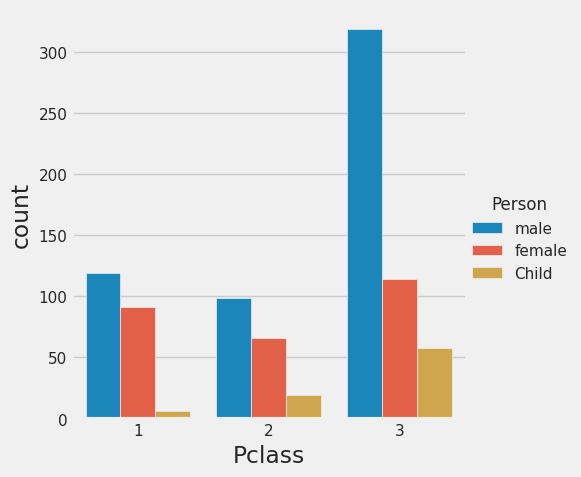

In [7]:
# Create a new column 'Person' in which every person under 16 is child.
titanic_df['Person'] = titanic_df.Sex
titanic_df.loc[titanic_df['Age'] < 16, 'Person'] = 'Child'
# Checking the distribution
print(f"Person categories : {titanic_df.Person.unique()}\n========")
print(f"Distribution of person : {titanic_df.Person.value_counts()}\n=============")
print(f"Mean age : {titanic_df.Age.mean()}\n==============")

sns.catplot(x='Pclass', data=titanic_df, hue='Person', kind='count')

És curiós que hi hagi més criatures a 3a classe.

Ara volem veure quina distribució d’edats hi ha en general. És tan simple com crear un histograma:


<Axes: >

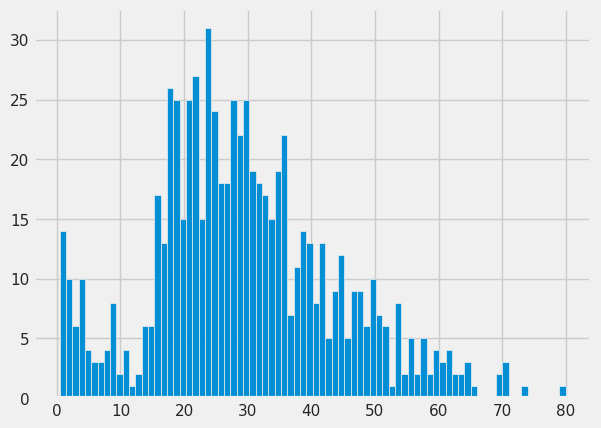

In [8]:
# visualizing age distribution
titanic_df.Age.hist(bins=80)

Hi ha una forma més elegant de representar aquestes dades, que les separarem per gèneres; usant [kdeplots](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).


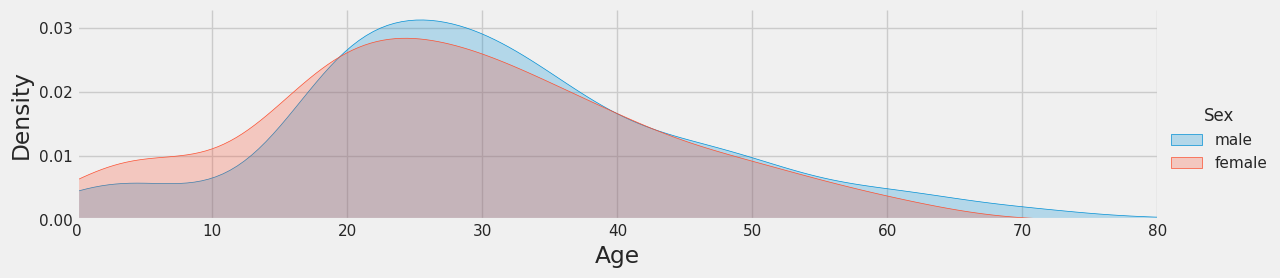

In [11]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot
fig = sns.FacetGrid(titanic_df, hue="Sex", aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

😎 Per fi veiem gràfics que són millors que els dels fulls de càlculs 😎  
Ara fem el mateix gràfic però per classes (PcClass)


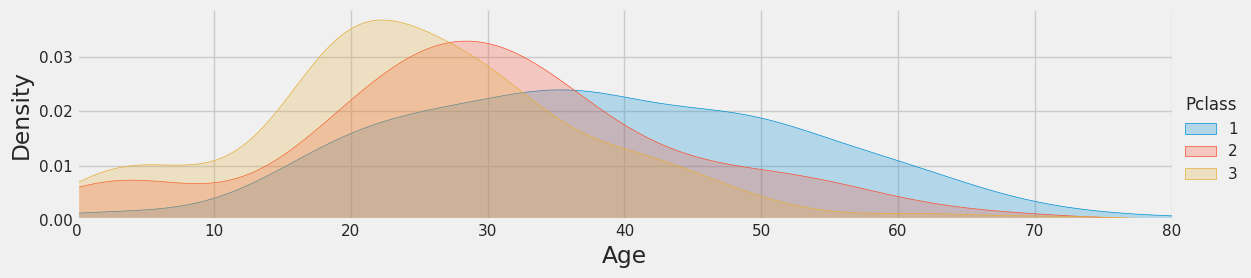

In [13]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

Veiem que en general la gent de tercera classe és més jove que 2a i 1a; i també podem inferir que la seva esperança de vida és menor (a partir dels 60 no hi ha gairebé ningú de 3a classe, pocs de 2a i en canvi més del 10% dels passatgers de primera classe tenen més de 60 anys).